QSAR Model: Predicting IC50 for EGFR Inhibitors

this notebook demonstrates a simple QSAR modle to predict IC50 values for EGFR inhibitors.

In [25]:
import zipfile

# مسیر فایل فشرده
zip_path = 'egfr_ic50_dataset.csv.zip'

# باز کردن فایل zip و استخراجش
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall()  # 

In [29]:
import os

# نام فایل فعلی (بعد از unzip)
old_name = 'DOWNLOAD-gU8RPQ5Wut7KaKJdHzr2fUYYJcpIjb0ClUND2cUakNk_eq_.csv'
# نام جدیدی که راحت‌تره
new_name = 'egfr_data.csv'

# تغییر نام
os.rename(old_name, new_name)


In [49]:
import pandas as pd

# خواندن فایل CSV با جداکننده سِمی‌کالن
df = pd.read_csv('egfr_data.csv', sep=';')

# نمایش ۵ سطر اول
df.head()


,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL2448065,NaN,NaN,467.37,0.0,4.90,15,COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCC1CCN(C)CC1.Cl,IC50,'=',...,CHEMBL1135889,1,Scientific Literature,J Med Chem,2002.0,NaN,NaN,NaN,NaN,0.10
1,CHEMBL539822,NaN,NaN,407.72,0.0,4.93,63,Cl.Nc1ccc2c(c1)sc1c(Nc3cccc(Br)c3)ncnc12,IC50,'=',...,CHEMBL1132555,1,Scientific Literature,J Med Chem,1999.0,NaN,NaN,NaN,NaN,0.47
2,CHEMBL540082,NaN,NaN,437.71,1.0,5.26,70,Cl.O=[N+]([O-])c1cccc2c1sc1c(Nc3cccc(Br)c3)ncnc12,IC50,'=',...,CHEMBL1132555,1,Scientific Literature,J Med Chem,1999.0,NaN,NaN,NaN,NaN,158.00
3,CHEMBL31118,NaN,NaN,412.29,0.0,3.95,24,CN(C)CCOc1cc2c(Nc3cccc(Br)c3)c(C#N)cnc2cn1,IC50,'>',...,CHEMBL1147619,1,Scientific Literature,Bioorg Med Chem Lett,2004.0,NaN,NaN,NaN,NaN,10000.00
4,CHEMBL282436,NaN,NaN,562.49,3.0,0.07,3b (NB-506),O=CNN1C(=O)c2c(c3c4cccc(O)c4n(C4OC(CO)C(O)C(O)...,IC50,'>',...,CHEMBL1131686,1,Scientific Literature,Bioorg Med Chem Lett,1999.0,NaN,NaN,NaN,NaN,200.00


In [37]:
# نمایش ۵ سطر اول
df.head()

# تعداد ستون‌ها و ردیف‌ها
df.shape

# نام ستون‌ها
df.columns


Index(['Molecule ChEMBL ID', 'Molecule Name', 'Molecule Max Phase',
       'Molecular Weight', '#RO5 Violations', 'AlogP', 'Compound Key',
       'Smiles', 'Standard Type', 'Standard Relation', 'Standard Value',
       'Standard Units', 'pChEMBL Value', 'Data Validity Comment', 'Comment',
       'Uo Units', 'Ligand Efficiency BEI', 'Ligand Efficiency LE',
       'Ligand Efficiency LLE', 'Ligand Efficiency SEI', 'Potential Duplicate',
       'Assay ChEMBL ID', 'Assay Description', 'Assay Type', 'BAO Format ID',
       'BAO Label', 'Assay Organism', 'Assay Tissue ChEMBL ID',
       'Assay Tissue Name', 'Assay Cell Type', 'Assay Subcellular Fraction',
       'Assay Parameters', 'Assay Variant Accession', 'Assay Variant Mutation',
       'Target ChEMBL ID', 'Target Name', 'Target Organism', 'Target Type',
       'Document ChEMBL ID', 'Source ID', 'Source Description',
       'Document Journal', 'Document Year', 'Cell ChEMBL ID', 'Properties',
       'Action Type', 'Standard Text Value', 'V

In [39]:
# فقط داده‌هایی که مربوط به IC50 هستن رو نگه داریم
df_ic50 = df[df['Standard Type'] == 'IC50']

# ستون‌های مورد نیاز رو نگه داریم
df_qsar = df_ic50[['Smiles', 'Standard Value']].copy()

# حذف داده‌هایی که SMILES یا مقدار ندارن
df_qsar.dropna(inplace=True)

# بررسی شکل نهایی
df_qsar.head()


,Smiles,Standard Value
0,COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCC1CCN(C)CC1.Cl,100.00
1,Cl.Nc1ccc2c(c1)sc1c(Nc3cccc(Br)c3)ncnc12,0.47
2,Cl.O=[N+]([O-])c1cccc2c1sc1c(Nc3cccc(Br)c3)ncnc12,158.00
3,CN(C)CCOc1cc2c(Nc3cccc(Br)c3)c(C#N)cnc2cn1,10000.00
4,O=CNN1C(=O)c2c(c3c4cccc(O)c4n(C4OC(CO)C(O)C(O)...,200000.00


In [41]:
df_qsar.rename(columns={'Smiles': 'smiles', 'Standard Value': 'IC50'}, inplace=True)

In [76]:
# تبدیل به عدد، و حذف مقادیر غیرعددی
df_qsar['IC50'] = pd.to_numeric(df_qsar['IC50'], errors='coerce')
df_qsar.dropna(subset=['IC50'], inplace=True)

# نمایش چند خط
df_qsar.head()

,smiles,IC50,pIC50
0,COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCC1CCN(C)CC1.Cl,100.00,7.000000
1,Cl.Nc1ccc2c(c1)sc1c(Nc3cccc(Br)c3)ncnc12,0.47,9.327902
2,Cl.O=[N+]([O-])c1cccc2c1sc1c(Nc3cccc(Br)c3)ncnc12,158.00,6.801343
3,CN(C)CCOc1cc2c(Nc3cccc(Br)c3)c(C#N)cnc2cn1,10000.00,5.000000
4,O=CNN1C(=O)c2c(c3c4cccc(O)c4n(C4OC(CO)C(O)C(O)...,200000.00,3.698970


In [45]:
import numpy as np

# تبدیل IC50 (برحسب nM) به pIC50
df_qsar['pIC50'] = -np.log10(df_qsar['IC50'] * 1e-9)


In [78]:
# استفاده از جداکننده صحیح (سِمی‌کالن)
df = pd.read_csv('egfr_data.csv', sep=';')

df.head()


,Molecule ChEMBL ID,Molecule Name,Molecule Max Phase,Molecular Weight,#RO5 Violations,AlogP,Compound Key,Smiles,Standard Type,Standard Relation,...,Document ChEMBL ID,Source ID,Source Description,Document Journal,Document Year,Cell ChEMBL ID,Properties,Action Type,Standard Text Value,Value
0,CHEMBL2448065,NaN,NaN,467.37,0.0,4.90,15,COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCC1CCN(C)CC1.Cl,IC50,'=',...,CHEMBL1135889,1,Scientific Literature,J Med Chem,2002.0,NaN,NaN,NaN,NaN,0.10
1,CHEMBL539822,NaN,NaN,407.72,0.0,4.93,63,Cl.Nc1ccc2c(c1)sc1c(Nc3cccc(Br)c3)ncnc12,IC50,'=',...,CHEMBL1132555,1,Scientific Literature,J Med Chem,1999.0,NaN,NaN,NaN,NaN,0.47
2,CHEMBL540082,NaN,NaN,437.71,1.0,5.26,70,Cl.O=[N+]([O-])c1cccc2c1sc1c(Nc3cccc(Br)c3)ncnc12,IC50,'=',...,CHEMBL1132555,1,Scientific Literature,J Med Chem,1999.0,NaN,NaN,NaN,NaN,158.00
3,CHEMBL31118,NaN,NaN,412.29,0.0,3.95,24,CN(C)CCOc1cc2c(Nc3cccc(Br)c3)c(C#N)cnc2cn1,IC50,'>',...,CHEMBL1147619,1,Scientific Literature,Bioorg Med Chem Lett,2004.0,NaN,NaN,NaN,NaN,10000.00
4,CHEMBL282436,NaN,NaN,562.49,3.0,0.07,3b (NB-506),O=CNN1C(=O)c2c(c3c4cccc(O)c4n(C4OC(CO)C(O)C(O)...,IC50,'>',...,CHEMBL1131686,1,Scientific Literature,Bioorg Med Chem Lett,1999.0,NaN,NaN,NaN,NaN,200.00


In [64]:
import pandas as pd

# مرحله 1: خواندن فایل
df = pd.read_csv('egfr_data.csv', sep=';')

# مرحله 2: فقط داده‌هایی که آزمایش‌شان IC50 بوده
df_ic50 = df[df['Standard Type'] == 'IC50'].copy()

# مرحله 3: نگه‌داشتن فقط دو ستون لازم: SMILES و IC50
df_ic50 = df_ic50[['Smiles', 'Standard Value']].copy()

# مرحله 4: تغییر نام ستون‌ها برای راحتی کار
df_ic50.columns = ['SMILES', 'IC50']

# مرحله 5: حذف ردیف‌هایی که مقدار ندارند
df_ic50.dropna(inplace=True)

# مرحله 6: تبدیل IC50 به عدد
df_ic50['IC50'] = pd.to_numeric(df_ic50['IC50'], errors='coerce')
df_ic50.dropna(subset=['IC50'], inplace=True)

# مرحله 7: حذف مقدارهای خیلی بزرگ (outlier)
df_ic50 = df_ic50[df_ic50['IC50'] < 100000]

# نمایش چند سطر
df_ic50.head()


,SMILES,IC50
0,COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCC1CCN(C)CC1.Cl,100.00
1,Cl.Nc1ccc2c(c1)sc1c(Nc3cccc(Br)c3)ncnc12,0.47
2,Cl.O=[N+]([O-])c1cccc2c1sc1c(Nc3cccc(Br)c3)ncnc12,158.00
3,CN(C)CCOc1cc2c(Nc3cccc(Br)c3)c(C#N)cnc2cn1,10000.00
6,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1NC(=O)/C=C...,790.00


In [68]:
from rdkit import Chem
from rdkit.Chem import Descriptors
import pandas as pd

# تابع محاسبه ویژگی‌ها
def calc_descriptors(smiles):
    mol = Chem.MolFromSmiles(smiles)
    if mol:
        mw = Descriptors.MolWt(mol)
        logp = Descriptors.MolLogP(mol)
        tpsa = Descriptors.TPSA(mol)
        return pd.Series([mw, logp, tpsa])
    else:
        return pd.Series([None, None, None])

# اعمال تابع به هر SMILES و اضافه کردن ستون‌های ویژگی
df_ic50[['MolWt', 'LogP', 'TPSA']] = df_ic50['SMILES'].apply(calc_descriptors)

# حذف ردیف‌هایی که ویژگی تولید نشده
df_ic50.dropna(inplace=True)

# نمایش
df_ic50.head()


,SMILES,IC50,MolWt,LogP,TPSA
0,COc1cc2c(Nc3ccc(Cl)cc3F)ncnc2cc1OCC1CCN(C)CC1.Cl,100.00,467.372,5.31690,59.51
1,Cl.Nc1ccc2c(c1)sc1c(Nc3cccc(Br)c3)ncnc12,0.47,407.724,5.35460,63.83
2,Cl.O=[N+]([O-])c1cccc2c1sc1c(Nc3cccc(Br)c3)ncnc12,158.00,437.706,5.68060,80.95
3,CN(C)CCOc1cc2c(Nc3cccc(Br)c3)c(C#N)cnc2cn1,10000.00,412.291,3.94798,74.07
6,COc1cc2ncc(C#N)c(Nc3cccc(Br)c3)c2cc1NC(=O)/C=C...,790.00,480.366,4.67748,90.28


In [71]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# انتخاب ویژگی‌ها و هدف
X = df_ic50[['MolWt', 'LogP', 'TPSA']]
y = df_ic50['IC50']

# تقسیم داده به آموزش و تست
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# مدل جنگل تصادفی (Random Forest)
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# پیش‌بینی روی داده تست
y_pred = model.predict(X_test)

# محاسبه خطاها
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'MSE: {mse:.2f}')
print(f'R² Score: {r2:.2f}')


MSE: 83756896.63
R² Score: 0.16


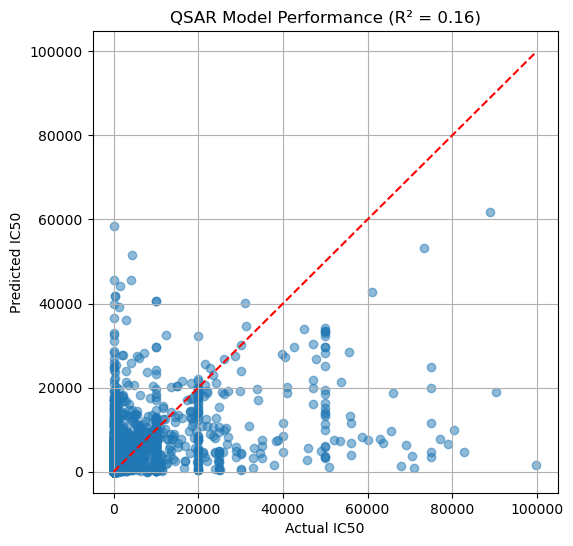

In [73]:
import matplotlib.pyplot as plt

plt.figure(figsize=(6,6))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.xlabel("Actual IC50")
plt.ylabel("Predicted IC50")
plt.title(f"QSAR Model Performance (R² = {r2:.2f})")
plt.grid(True)
plt.show()
